# Model comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

from enum import Enum
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve

import joblib

In [2]:
def learning_curves(estimator, X, Y, train_sizes, cv, scoring = "accuracy", modelName = ''):
    
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, X, Y, train_sizes = train_sizes, cv = cv, scoring = scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training ' + scoring)
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation ' + scoring)

    plt.ylabel(scoring, fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves bases on test size and ' + scoring + ' for ' + modelName
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()

## Reading in data and predictions of model

In [3]:
Options = Enum('Model options', ['y', 'mnb', 'knn', 'svm'])

In [4]:
#function returns predictions and probabilities data, from file, depending on the option 
def readData(option):
    if option == Options.y:
        prob, pred = _, np.ravel(pd.read_csv('../data/test/y_test.csv'))
    if option in(Options.knn, Options.mnb, Options.svm):
        prob = np.ravel(pd.read_csv('results/'+option.name+'_prob.csv'))
        pred = np.ravel(pd.read_csv('results/'+option.name+'_pred.csv'))
            
    return np.ravel(prob), np.ravel(pred)

#### Read in train data:

In [5]:
X_train = pd.read_csv('../data/train/X_train.csv')
y_train = np.ravel(pd.read_csv('../data/train/y_train.csv'))

#### Read in real class for test data:

In [6]:
_, y_classes = readData(Options.y)

#### Multinomial naive Bayes predictions:

In [7]:
mnb_prob, mnb_pred = readData(Options.mnb)

#### KNN - K Nearest Neighbours predictions:

In [8]:
knn_prob, knn_pred = readData(Options.knn)

#### SVM predictions:

In [9]:
svm_prob, svm_pred = readData(Options.svm)

In [10]:
# plt.style.use('seaborn-pastel')
# print(plt.style.available)

## ROC curve

In [11]:
#we will need Encoder beacuse our classes are string, but ofcourse, plots wors better with numbers :)
Encoder = LabelEncoder()
y_classes_enc = Encoder.fit_transform(y_classes)

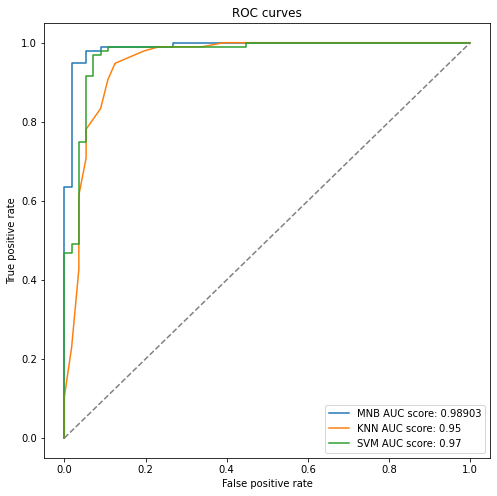

In [12]:
plt.subplots(1, figsize=(8,8))
plt.title('ROC curves')

#MNB
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_classes_enc, mnb_prob)
test_score1 = round(roc_auc_score(y_classes_enc, mnb_prob), 5)
plt.plot(false_positive_rate1, true_positive_rate1, label="MNB AUC score: " + str(test_score1))
    
#KNN
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_classes_enc, knn_prob)
test_score2 = round(roc_auc_score(y_classes_enc, knn_prob), 2)
plt.plot(false_positive_rate2, true_positive_rate2, label="KNN AUC score: " + str(test_score2))
    
#SVM
false_positive_rate, true_positive_rate, threshold = roc_curve(y_classes_enc, svm_prob)
test_score = round(roc_auc_score(y_classes_enc, svm_prob), 2)
plt.plot(false_positive_rate, true_positive_rate, label="SVM AUC score: " + str(test_score))
    
    
plt.plot([0, 1], ls="--", color='gray')
plt.legend(loc='lower right')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

## Accuracy of models

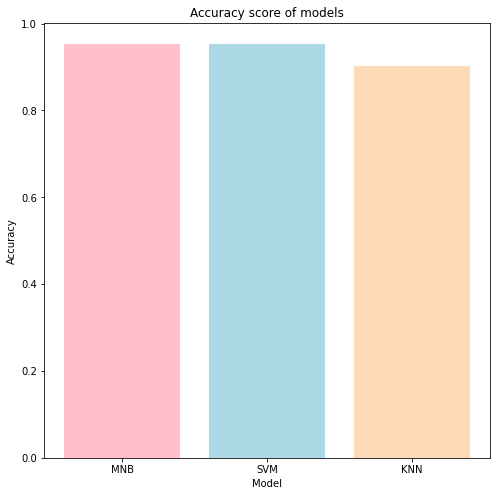

In [13]:
plt.subplots(1, figsize=(8,8))
plt.title('Accuracy score of models')

models = ['MNB', 'SVM', 'KNN']
accs = [accuracy_score(y_classes, mnb_pred), accuracy_score(y_classes, svm_pred), accuracy_score(y_classes, knn_pred)]
plt.bar(models, accs, color=['pink', 'lightblue', 'peachpuff'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

### Reading in models for curves drawing:

In [14]:
mnbModel = joblib.load('models/mnbModel.joblib')

In [15]:
svmModel = joblib.load('models/svmModel.joblib')

In [16]:
knnModel = joblib.load('models/knnModel.joblib')

## Learning curves - accuracy

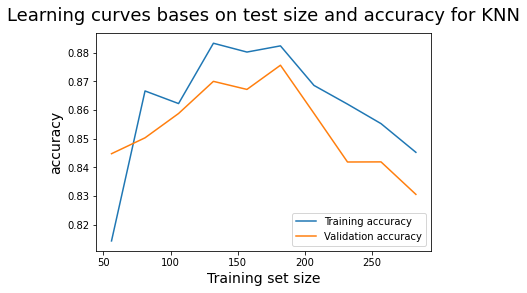

In [17]:
learning_curves(knnModel, X_train, y_train, np.linspace(0.2, 1.0, 10), 5, scoring = "accuracy", modelName = 'KNN')

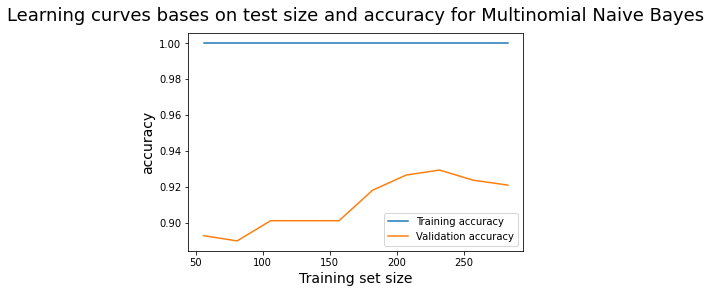

In [18]:
learning_curves(mnbModel, X_train, y_train, np.linspace(0.2, 1.0, 10), 5, scoring = "accuracy", modelName = 'Multinomial Naive Bayes')

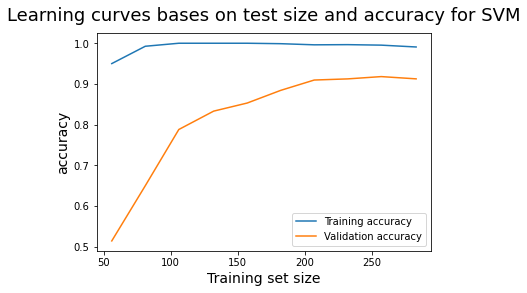

In [19]:
learning_curves(svmModel, X_train, y_train, np.linspace(0.2, 1.0, 10), 5, scoring = "accuracy", modelName = 'SVM')